# Content

* 1. Import Libraries

* 2. Set Path

* 3. Import Data

* 4. Overview of data

* 5. Scatterplots
    * 5.1 Replace unwanted values
    
* 6. Histogram

* 7. Bar Charts

* 8. Create sample to represent population
    * 8.1 Set seed
    * 8.2 Create 70/30 Subsample
 
* 9. Line Chart

* 10. Exercise 4.9 Part 2
    * 10.1 Task 3
    * 10.2 Task 4
    * 10.3 Task 5
    * 10.4 Task 6
    * 10.5 Task 7
    
* 11. Export

# 1. Import libraries

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Set work path

In [2]:
# set working path
path=r'/Users/phongsathorn/Documents/Data Analytics/CareerFoundry/Achievement 4 - Python/InstaCart/Instacart Business Analysis'

# 3. Import Data

In [5]:
# import dataframe

df=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','custom_ords_prods_merge_clean.pkl'))

# 4. Overview of dataframe

In [6]:
df.shape

(32404859, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   user_id                     object  
 1   Gender                      object  
 2   address                     object  
 3   Age                         int64   
 4   date_joined                 object  
 5   relatives                   int64   
 6   income                      int64   
 7   Fam_status                  object  
 8   year_joined                 object  
 9   order_id                    object  
 10  order_number                int64   
 11  weekday_of_order            int64   
 12  time_of_day                 int64   
 13  days_since_previous_order   float64 
 14  product_id                  object  
 15  add_to_cart_order           int64   
 16  reordered                   int64   
 17  product_name                object  
 18  department_id               object  
 19

In [8]:
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

# 5. Scatterplots

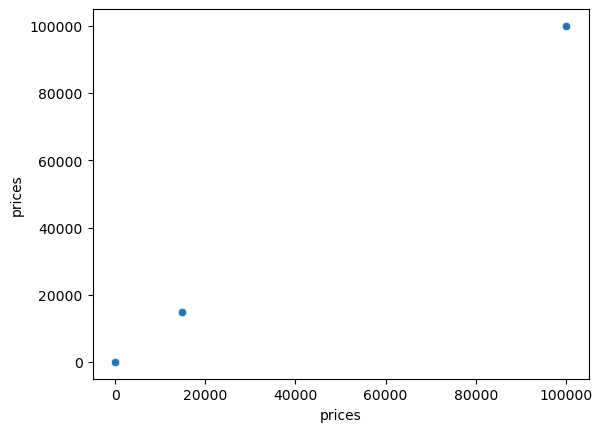

In [9]:
# create a scatterplot to see outliers of prices

scatter=sns.scatterplot(x = 'prices', y = 'prices',data = df)

The mean of the 'prices' is around 12.
BUT 2 data points are close to 20,000 and even 100,000.
This close-to-100,000 value corresponds to the max value you identified in your checks.
But what about the close-to-20,000 value?

Let’s determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item.

Investigate for prices over 100$ in the df.


## 5.1 Find values > 100 and replace it with na

In [10]:
# gives all the rows in 'prices' colum that is > 100

df.loc[df['prices'] > 100]

,user_id,Gender,address,Age,date_joined,relatives,income,Fam_status,year_joined,order_id,...,price_range,Busiest Days,busiest_period_of_day,max_order,loyalty,mean_product_price,customer_type,median_days_between_orders,frequency,_merge
5547,117740,Female,Oregon,55,1/1/2017,1,292759,married,2017,3369785,...,High-range product,Busiest days,Most orders,84,Loyal Customer,36.928431,High spender,4.0,Frequent Customer,both
10303,31590,Female,Montana,46,1/1/2017,0,154076,single,2017,830157,...,High-range product,Busiest days,Average orders,38,Regular customer,58.139865,High spender,8.0,Frequent Customer,both
27945,100958,Male,North Dakota,18,1/2/2017,2,113408,single,2017,2732823,...,High-range product,Regularly day,Average orders,5,New customer,627.991667,High spender,11.0,Regular-frequent Customer,both
27946,100958,Male,North Dakota,18,1/2/2017,2,113408,single,2017,2471612,...,High-range product,Busiest days,Most orders,5,New customer,627.991667,High spender,11.0,Regular-frequent Customer,both
27947,100958,Male,North Dakota,18,1/2/2017,2,113408,single,2017,2829915,...,High-range product,Busiest days,Most orders,5,New customer,627.991667,High spender,11.0,Regular-frequent Customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32390922,5519,Female,Georgia,78,4/1/2020,3,262610,married,2020,288789,...,High-range product,Slowest days,Most orders,53,Loyal Customer,69.638604,High spender,7.0,Frequent Customer,both
32390923,5519,Female,Georgia,78,4/1/2020,3,262610,married,2020,1615768,...,High-range product,Regularly day,Average orders,53,Loyal Customer,69.638604,High spender,7.0,Frequent Customer,both
32390924,5519,Female,Georgia,78,4/1/2020,3,262610,married,2020,1744232,...,High-range product,Regularly day,Most orders,53,Loyal Customer,69.638604,High spender,7.0,Frequent Customer,both
32396990,140589,Male,Maryland,26,4/1/2020,0,154845,single,2020,1244840,...,High-range product,Regularly day,Average orders,9,New customer,876.974783,High spender,20.0,Regular-frequent Customer,both


In [11]:
# Replace all the unrealistic numbers with NaN values

df.loc[df['prices'] >100, 'prices'] = np.nan

In [12]:
# check for max price in 'prices' column

df['prices'].max()

25.0

# 6. Histogram

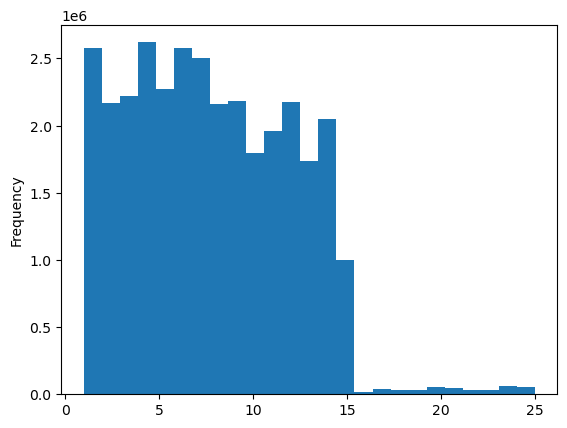

In [13]:
histogram=df['prices'].plot.hist(bins=25)

Most objects have the price between 1 and 15$.

Only a few are from 15 to 25$.

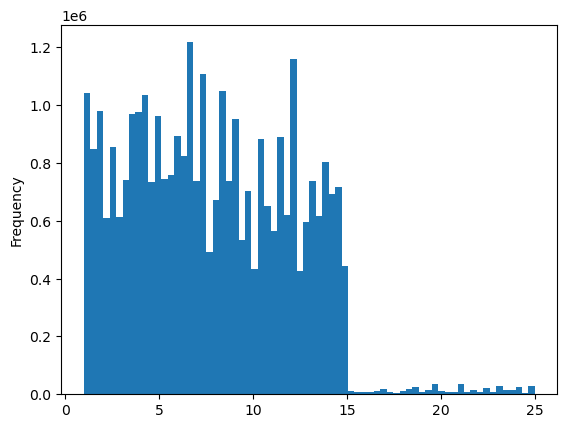

In [14]:
## Chaning the bins will show more variety in the histogram

histogram2=df['prices'].plot.hist(bins=70)

In [15]:
#Export the histogram

histogram2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

# 7. Bar Charts

<Axes: xlabel='weekday_of_order'>

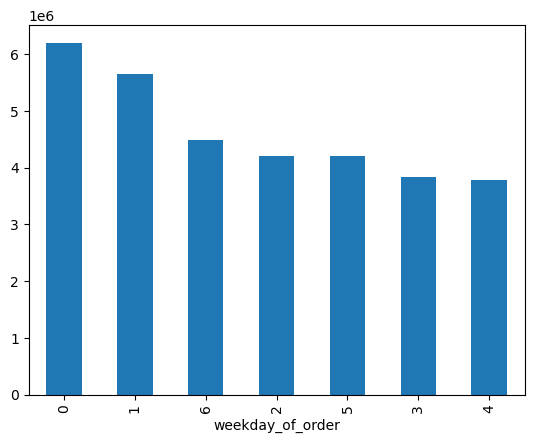

In [16]:
df['weekday_of_order'].value_counts().plot.bar()

<Axes: xlabel='weekday_of_order'>

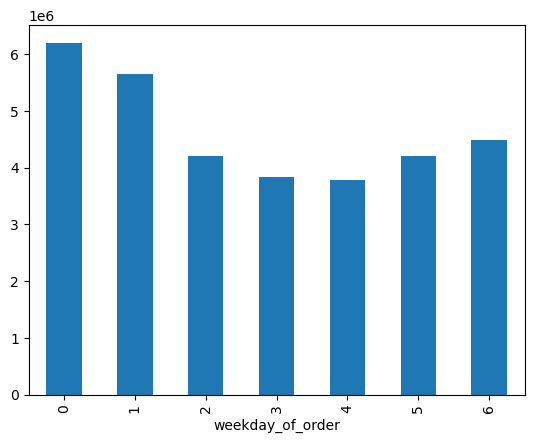

In [17]:
# Use .sort_index() to sort the bar according to index order

df['weekday_of_order'].value_counts().sort_index().plot.bar()

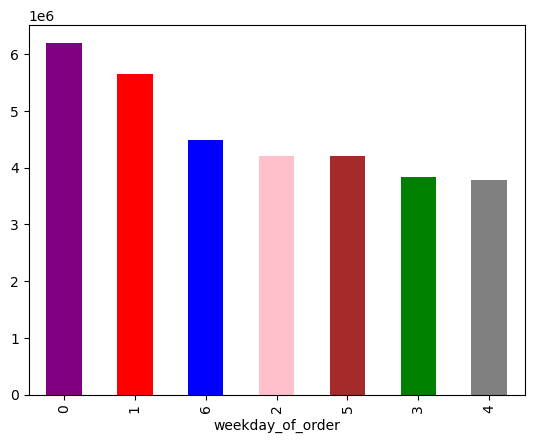

In [18]:
# Adding color to the bars and save the plot into a new variable

bar=df['weekday_of_order'].value_counts().plot.bar(color=['purple','red','blue','pink','brown','green','grey'])

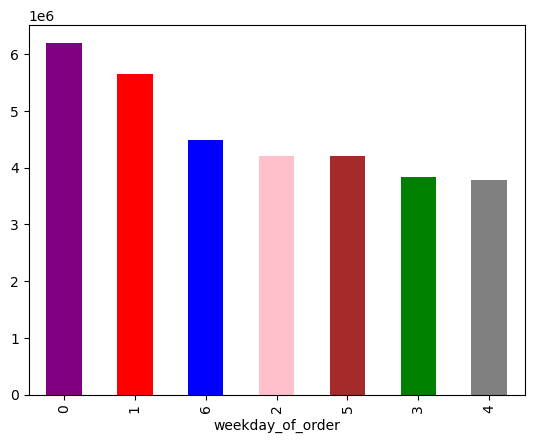

In [19]:
# To see the plot
bar.figure

In [20]:
## To export the plot

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

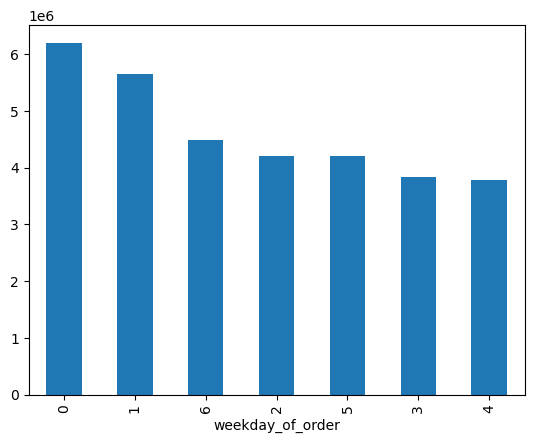

In [63]:
## Create a bar plot for weekday_of_order agian , with normal corlor

bar3=df['weekday_of_order'].value_counts().plot.bar()

In [64]:
# Export the bar plot
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_weekday_of_order.png'))

# 8. Creating a Sample to represent Poplation

Using a randomize sample from an entire population to represents the entire population.

Create a "70/30 ratio Sample" that can represents an entire population.


## 8.1 Set seed 

In [21]:
# Set the seed and create a list to store the values

np.random.seed(4)

# Create a list that holds True/False values to the test np.random.rand(len(df))<=0.7

dev = np.random.rand(len(df)) <= 0.7


This code sets a seed for generating random numbers, then creates a boolean list named 'dev'.

The list "dev" contains 32404859 random numbers (same like the dataframe size in rows).

Each element in 'dev' is "True" if a randomly generated number is <= 0.7, and "False" otherwise. 

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

You now have a list of 32434212 boolean values and a dataframe that’s 32,434,212 rows long. How can you use your list to split your dataframe into two samples?

This will involve an elegant hack:

## 8.2 Create 70/30 ratio samples to work with

In [23]:
# Store 70% of the sample into a dataframe called'big'

big = df[dev]

In [24]:
# Store 30% of the sample into a dataframe called 'small'
small = df[~dev]

In [25]:
# Check if big + small gives the sum of the entire df size or not

#df size
len(df)

32404859

In [26]:
# sum of big+small

len(big)+len(small)

32404859

Create a new datafram with only the variable/columns from the new created dataframes that is necessary for the graph!!

Here: 'prices' and 'weekday_of_order'


This will speed up the process.

In [27]:
df_2 = small[['weekday_of_order','prices']]

# 9. Line Chart

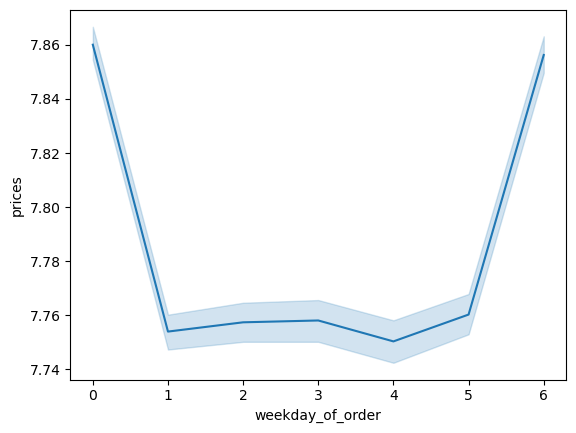

In [28]:
# create the line chart

line = sns.lineplot(data = df_2, x = 'weekday_of_order',y = 'prices')

In [39]:
#export plot


line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineplot_prices_in_week.png'))

# 10. Exercise 4.9 
# Task 3. Histogram for time_of_day

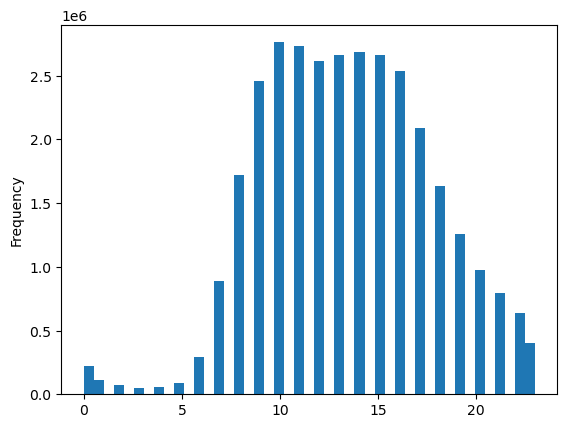

In [29]:
histogram3=df['time_of_day'].plot.hist(bins=45)

The histogram displays the development of orders by customers during the day. 
From Midnight to 5am, the least orders are conducted.
From 6am, the orders are getting higher in numbers and reaches the peak at 10am.
The highest numbers of orders are between 10am and 3pm.
After 4 pm the number decreases again.

We can say that the busiest hours of the day are between 10am and 3pm.
The least active hours are between midnight and 5 am.

In [40]:
## To export the plot

histogram3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_during_day.png'))

# 10.2 Task 4

## Distribution of loyal customers

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal Customer'),
  Text(2, 0, 'New customer')])

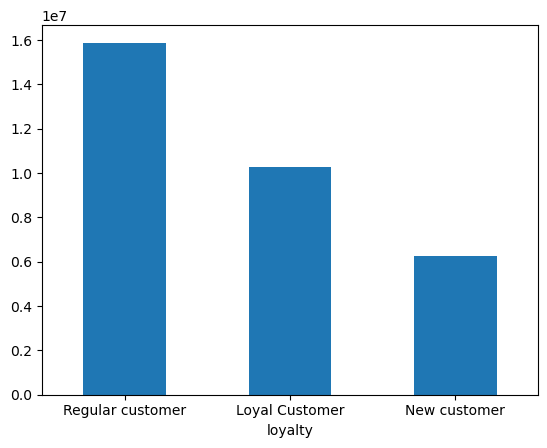

In [59]:
histogram4=df['loyalty'].value_counts().plot.bar()
plt.xticks(rotation=0)

The majority of our customers are regular customers, followed by "loyal customers" and then"new customers".

We can say that the most of our custumers have already ordered between 10 to 40 times in total.

Our loyal customers have ordered more than 40 times via our app.

New customers have less than 10 orders in total.

In [61]:
## To export the plot

histogram4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

# 10.3 
## Task 5. Check for price development during the day

In [31]:
# Group the data by hour of the day and calculate the average expenditure

hourly_prices = df.groupby('time_of_day')['prices'].mean().reset_index()

[Text(0.5, 0, 'Hour of the Day'), Text(0, 0.5, 'Average Expenditure')]

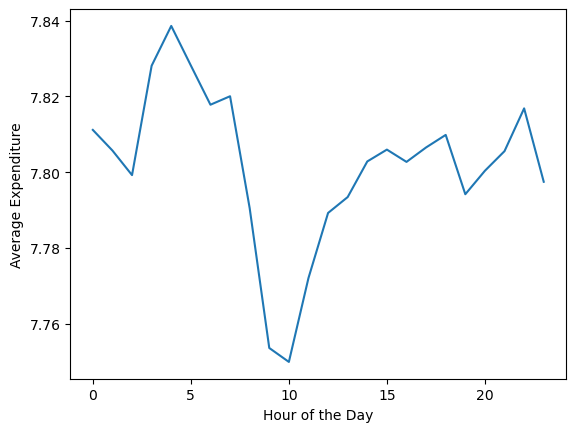

In [32]:
# Plot a line chart
line_chart = sns.lineplot(data=hourly_prices, x='time_of_day', y='prices')
line_chart.set(xlabel='Hour of the Day', ylabel='Average Expenditure')

In [42]:
## To export the plot

line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_avg_price.png'))

# 10.4 
## Task 6

First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [33]:
# Set the seed and create a list to store the values

np.random.seed(5)

# Create a list that holds True/False values to the test np.random.rand(len(df))<=0.7

dew = np.random.rand(len(df)) <= 0.7

In [34]:
# creat a 70% dataframe

big2=df[dew]

In [35]:
# Store 30% of the sample into a dataframe called 'small'
small2 = df[~dew]

In [37]:
df_age_rel=small2[['Age','relatives']]

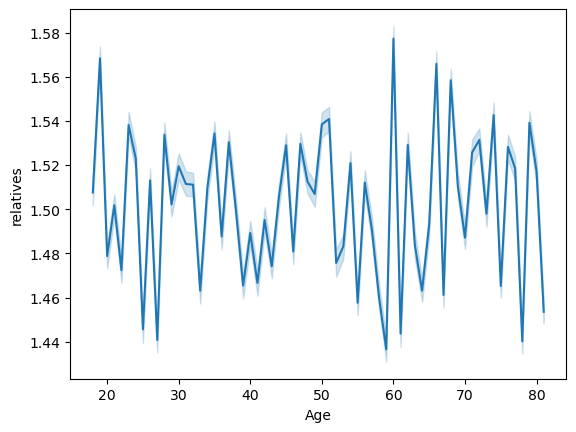

In [38]:
# create line chart

line_2 = sns.lineplot(data = df_age_rel, x = 'Age',y = 'relatives')

In [43]:
## To export the plot

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_relatives.png'))

There is no connection between age and the number of relatives for the customers

(array([0, 1]), [Text(0, 0, 'married'), Text(1, 0, 'single')])

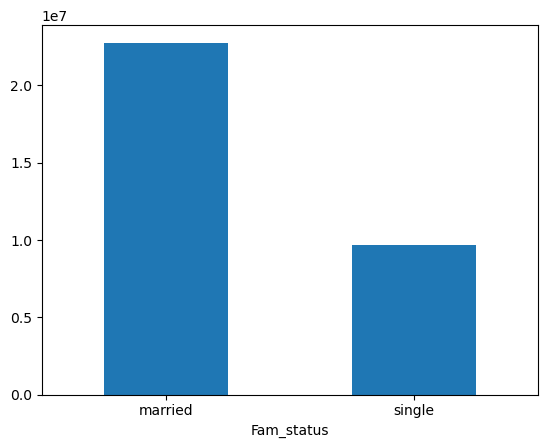

In [60]:
# Create bar plot to show number of relatives within the family status

bar_2=df['Fam_status'].value_counts().plot.bar()
plt.xticks(rotation=0)

Vast majority of customers are married.

In [62]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status.png'))

# 10.5 
## Task 7 : Correlation of Age and Income


Find connection between age and spending power (income). 

To visualize this relationship, create a scatterplot using the sns.scatterplot() function. 

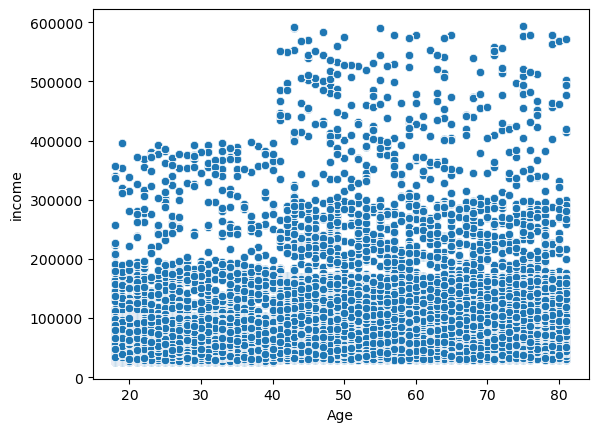

In [46]:
# Using the entire data to create scatterplot

scatter_2=sns.scatterplot(x = 'Age', y = 'income',data = df)

In [55]:
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [56]:
df['income'].corr(df['Age'])

0.41724569564693587

There is no correlation between the age and income of customers.

However, it is visible that an income upto ~190000  is provided between 18 and 80 years of age.
Some customers between 18 and 40 show an income up to ~400000 per year.
After 40 years of age,  a part of our customers display in income up to 600000 per year .
In general, it can be said that starting from 40 years of age, higher salary are obtained (>200000).

In [58]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'),dpi=300)

# 11. Export the file

In [65]:
df.to_pickle(os.path.join(path,'02 Data','Prepared Data','custom_ords_prods_merge_clean_2.pkl'))